In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2023-08-06 04:13:03--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.09s   

2023-08-06 04:13:03 (753 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as tl
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer=Tokenizer()

data= open('/tmp/irish-lyrics-eof.txt','r').read()

corpus=data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

total_words

2690

In [ ]:
input_sequences=[]

for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_len=max([len(x) for x in input_sequences])

input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_len,padding='pre'))

xs,labels = input_sequences[:,:-1],input_sequences[:,-1]

ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [ ]:
print(xs[6])
print(ys[6])
print(tokenizer.word_index)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear

In [ ]:
model=tf.keras.models.Sequential([
    tl.Embedding(total_words,100,input_length=max_len-1),
    # tl.Bidirectional(tl.LSTM(128,return_sequences=True)),
    tl.Bidirectional(tl.LSTM(64)),
    tl.Dense(total_words,activation='softmax')
])

lr_schedule= ExponentialDecay(
    0.01,
    3000,
    0.96
)

model.summary()
model.compile(optimizer=Adam(lr_schedule),loss='categorical_crossentropy',metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs,ys,epochs=50,verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 15, 100)           269000    
                                                                 
 bidirectional_20 (Bidirecti  (None, 15, 256)          234496    
 onal)                                                           
                                                                 
 bidirectional_21 (Bidirecti  (None, 128)              164352    
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 2690)              347010    
                                                                 
Total params: 1,014,858
Trainable params: 1,014,858
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
377/377 [=======================

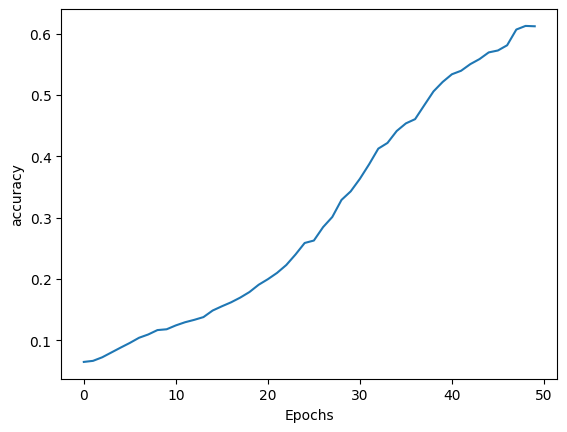

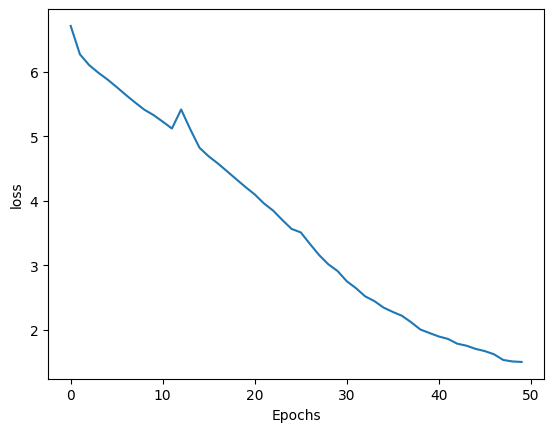

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
seed_text= 'i love you'
next_words=100

for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list],maxlen=max_len-1,padding='pre')
  predicted=np.argmax(model.predict(token_list),axis=-1)
  output_word=''
  for word,index in tokenizer.word_index.items():
    if index==predicted:
      output_word=word
      break
  seed_text+=" " + output_word

print(seed_text)

1/1 [==============================] - 0s 24ms/step
i love you love the ground whereon he goes of mind and who are they and my mind he hath girded on their eyes they eyes on your eyes are they were so and the love and her rose of the summer my bride by gone and gone and love and gone and my love gone and i hear you love a connaught maid i love me and the fair of all gone and my love love love mary me wish your eyes well sweet molly malone high as the dudeen i puff for gone and gone and gone and gone and my
